<h2><center><strong>Loan Prediction


Kaggle <strong>[data set](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).</strong><br><br>


<h2><strong><center>Data Wragling

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Setting the figure size and title size
rcParams["figure.figsize"] = 7, 6
plt.rcParams['axes.titlesize'] = 20

# Setting the plotting style
sns.set_style("whitegrid")

In [2]:
# Read the loan dataset CSV file using Pandas read_csv function.
# Specify the file path and the encoding as "unicode_escape" to handle any special characters in the file.
base_df = pd.read_csv("Loan_dataset.csv", encoding="unicode_escape")

# Define theme colors to use in visualizations.
theme_colors = ["#ff8533", "#808080"]

# Define the font size to use in visualizations.
font = 13

In [3]:
# Define theme_colors variable if not defined previously

# Set base_df to your desired DataFrame object

# Select a random sample of 10 rows from the DataFrame
sample_df = base_df.sample(n=10)

# Highlight any null values in the sample using the specified color
styled_df = sample_df.style.highlight_null(null_color=theme_colors[1])

# Display the stylized DataFrame object
styled_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.000000,99.000000,360.000000,nan,Semiurban,Y
472,LP002519,Male,Yes,3+,Graduate,No,4691,0.000000,100.000000,360.000000,1.000000,Semiurban,Y
496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.000000,107.000000,360.000000,1.000000,Rural,Y
230,LP001765,Male,Yes,1,Graduate,No,2491,2054.000000,104.000000,360.000000,1.000000,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.000000,115.000000,180.000000,1.000000,Semiurban,Y
170,LP001581,Male,Yes,0,Not Graduate,nan,1820,1769.000000,95.000000,360.000000,1.000000,Rural,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.000000,360.000000,1.000000,Urban,Y
120,LP001426,Male,Yes,nan,Graduate,No,5667,2667.000000,180.000000,360.000000,1.000000,Rural,Y
72,LP001248,Male,No,0,Graduate,No,3500,0.000000,81.000000,300.000000,1.000000,Semiurban,Y
288,LP001931,Female,No,0,Graduate,No,4124,0.000000,115.000000,360.000000,1.000000,Semiurban,Y


In [4]:
# Define the theme colors to be used
theme_colors = ["#6495ED", "#F08080"]

# Sample 10 rows randomly from the base_df and highlight null values with a specified color
sample_df = base_df.sample(n=10).style.highlight_null(null_color=theme_colors[1])

sample_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
191,LP001656,Male,No,0,Graduate,No,12000,0.000000,164.000000,360.000000,1.000000,Semiurban,N
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.000000,115.000000,180.000000,1.000000,Semiurban,Y
440,LP002408,Male,No,0,Graduate,No,3660,5064.000000,187.000000,360.000000,1.000000,Semiurban,Y
412,LP002328,Male,Yes,0,Not Graduate,No,6096,0.000000,218.000000,360.000000,0.000000,Rural,N
351,LP002140,Male,No,0,Graduate,No,8750,4167.000000,308.000000,360.000000,1.000000,Rural,N
72,LP001248,Male,No,0,Graduate,No,3500,0.000000,81.000000,300.000000,1.000000,Semiurban,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.000000,128.000000,360.000000,1.000000,Urban,Y
176,LP001608,Male,Yes,2,Graduate,No,2045,1619.000000,101.000000,360.000000,1.000000,Rural,Y
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.000000,152.000000,nan,0.000000,Rural,N
432,LP002386,Male,No,0,Graduate,nan,12876,0.000000,405.000000,360.000000,1.000000,Semiurban,Y


In [5]:
# Apply a text gradient to the first 5 rows of the base_df using a specified color map
cm = sns.light_palette(theme_colors[0], as_cmap=True)
gradient_df = base_df.head().style.background_gradient(cmap=cm)

In [6]:
# Print the column information of the base_df
print("Data columns info: \n")
base_df.info(verbose=True)

Data columns info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Print the Statistics of numeric data
print("Statistics of numeric data: \n")

df = base_df.copy()
base_df.describe()

Statistics of numeric data: 



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Check the shape of the dataframe
print("Shape of dataframe:", base_df.shape)

Shape of dataframe: (614, 13)


In [9]:
# Check if there are any duplicated rows in the dataframe
print("Are there any duplicated rows?:", base_df.duplicated().any())

Are there any duplicated rows?: False


There are NANs in the dataframe and no duplicated rows.

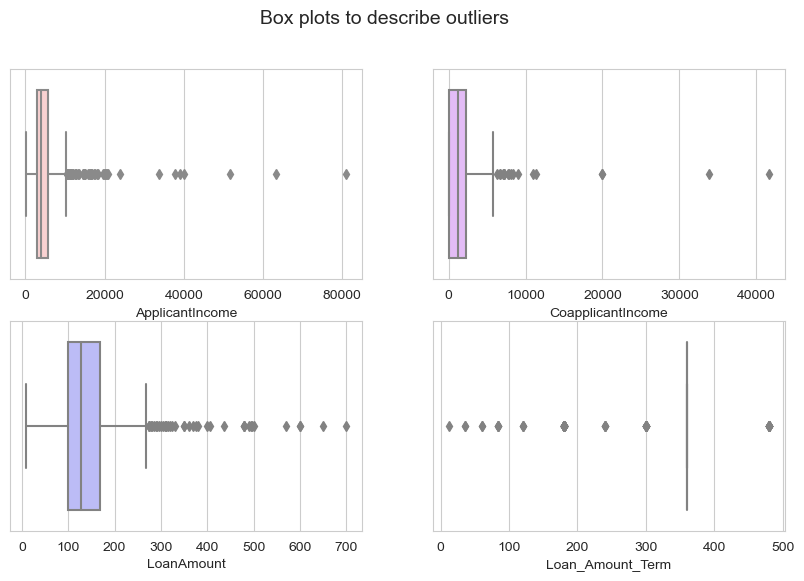

In [11]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot a boxplot for LoanAmount in the bottom left subplot
sns.boxplot(x=base_df["LoanAmount"], ax=axes[1, 0], color="#b3b3ff")

# Plot a boxplot for Loan_Amount_Term in the bottom right subplot
sns.boxplot(x=base_df["Loan_Amount_Term"], ax=axes[1, 1], color="#b3ffd9")

# Plot a boxplot for ApplicantIncome in the top left subplot
sns.boxplot(x=base_df["ApplicantIncome"], ax=axes[0, 0], color="#ffcccc")

# Plot a boxplot for CoapplicantIncome in the top right subplot
sns.boxplot(x=base_df["CoapplicantIncome"], ax=axes[0, 1], color="#e6b3ff")

# Set the font size for the title
FONT_SIZE = 14

# Set the title for the figure
fig.suptitle("Box plots to describe outliers", fontsize=FONT_SIZE)

# Display the figure
plt.show()


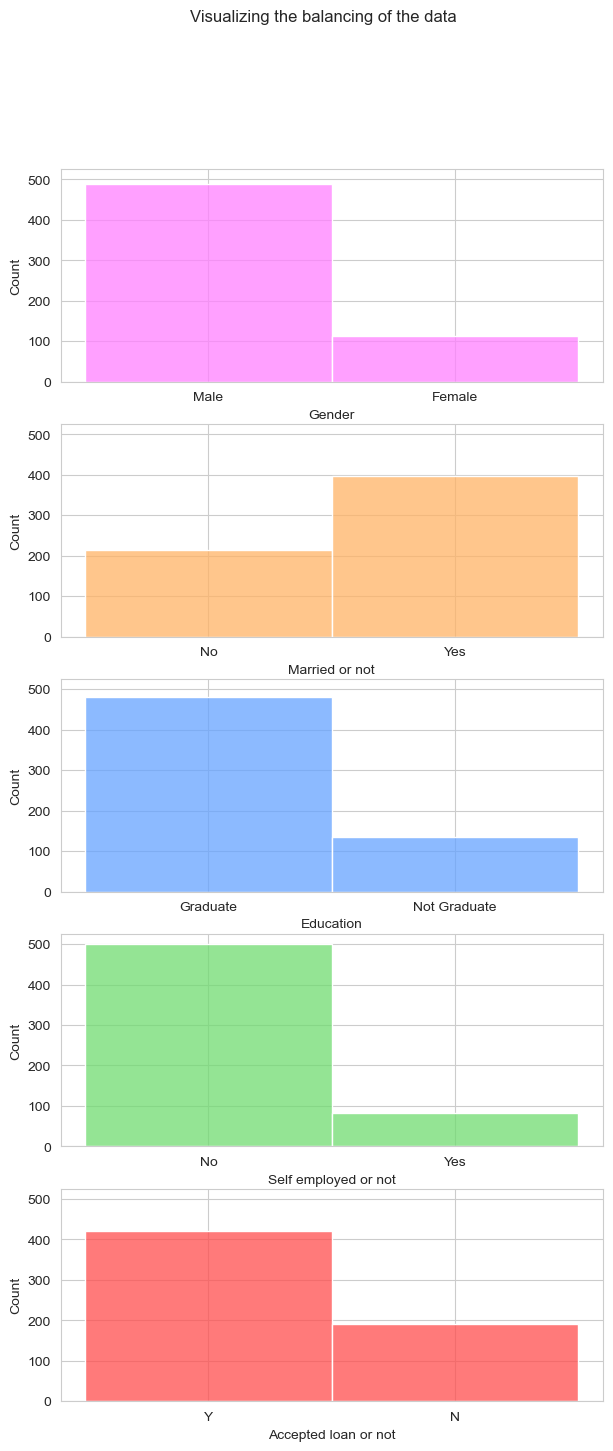

In [13]:
# Create subplots with 5 rows and share y-axis
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharey=True)

def histogram(col_name, c, x_label, axes, data):
    """
    Plots a histogram of the given column name using Seaborn and sets the x and y labels.

    Args:
    - col_name (str): Name of the column to plot
    - c (str): Color of the histogram
    - x_label (str): Label for the x-axis
    - axes (AxesSubplot): Axes subplot to plot the histogram
    - data (pandas.DataFrame): DataFrame containing the data to plot
    """
    sns.histplot(x=col_name, data=data, ax=axes, color=c)
    axes.set_xlabel(x_label)
    axes.set_ylabel('Count')

# Plot histograms for each column on a separate subplot
histogram("Gender", "#ff80ff", "Gender", ax1, base_df)
histogram("Married", "#ffb366", "Married or not", ax2, base_df)
histogram("Education", "#66a3ff", "Education", ax3, base_df)
histogram("Self_Employed", "#70db70", "Self employed or not", ax4, base_df)
histogram("Loan_Status", "#ff4d4d", "Accepted loan or not", ax5, base_df)

# Set figure size and dpi, and add title
fig.set_size_inches(7, 16)
fig.set_dpi(100)
fig.suptitle("Visualizing the balancing of the data", fontsize=12)

# Display the plot
plt.show()


The data is not very balanced so we will random over sample it
later.

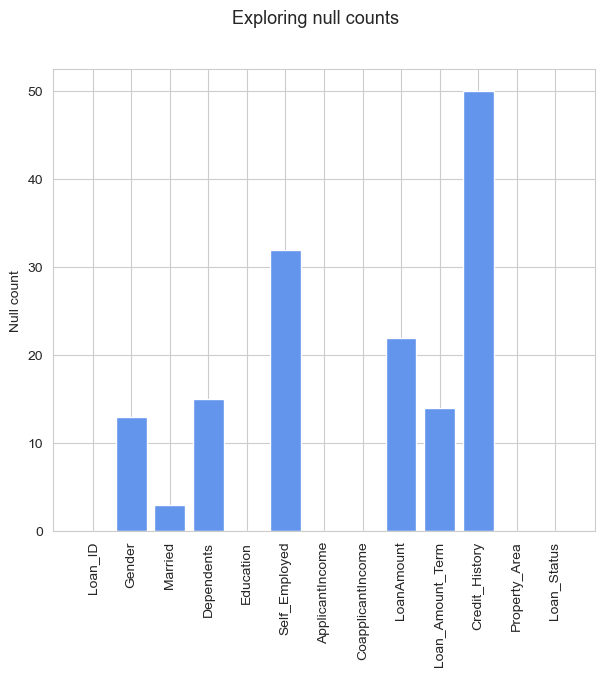

In [15]:
# Create a figure and a single subplot
fig, axes = plt.subplots(1)

# Create an empty list to store the number of null values for each column
null_count = []

# Iterate over each column in the dataframe and count the number of null values
for col in df.columns:
    null_count.append(df[col].isnull().sum())

# Create a bar plot of the null counts for each column
axes.bar(df.columns, null_count, color=theme_colors[0])

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Add a label to the y-axis
plt.ylabel("Null count")

# Add a title to the figure
fig.suptitle("Exploring null counts", fontsize=font)

# Display the plot
plt.show()


In [17]:
# Convert categorical data into numerical labels using pandas' factorize function
# and calculate the correlation matrix using Spearman's rank correlation method
df_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1)

# Define a color map using seaborn's light_palette function
cm = sns.light_palette('blue', as_cmap=True)

# Apply the color map to the correlation matrix and display the resulting heatmap
df_corr.style.background_gradient(cmap=cm)

# # Print a message indicating that categorical features such as gender and id
# # may be affecting the correlation matrix
# print("Note: Categorical features such as gender and id may be affecting the correlation matrix.")


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,0.010643,-0.011915,0.051586,0.039442,0.036564,0.813295,0.268943,0.352690,0.058098,0.016315,0.066063,-0.011773
Gender,0.010643,1.000000,-0.354202,-0.164005,-0.027810,-0.041636,-0.012723,-0.195068,0.023923,-0.055177,-0.016876,0.069183,0.010192
Married,-0.011915,-0.354202,1.000000,0.357205,0.019461,0.028345,-0.002094,0.295601,0.014635,0.025162,-0.029229,-0.001634,-0.081335
Dependents,0.051586,-0.164005,0.357205,1.000000,0.043806,0.058607,0.074472,0.015856,0.056391,0.097798,0.015203,-0.003330,-0.013959
Education,0.039442,-0.027810,0.019461,0.043806,1.000000,0.000033,0.071721,0.079733,-0.079726,0.049890,0.039795,-0.005226,0.085884
Self_Employed,0.036564,-0.041636,0.028345,0.058607,0.000033,1.000000,0.010179,-0.078073,0.006195,0.020281,0.051911,0.033406,0.010901
ApplicantIncome,0.813295,-0.012723,-0.002094,0.074472,0.071721,0.010179,1.000000,0.238265,0.325714,0.002665,0.010569,0.078226,-0.021387
CoapplicantIncome,0.268943,-0.195068,0.295601,0.015856,0.079733,-0.078073,0.238265,1.000000,0.125149,0.027053,-0.055467,0.015829,-0.087383
LoanAmount,0.352690,0.023923,0.014635,0.056391,-0.079726,0.006195,0.325714,0.125149,1.000000,0.079183,-0.001893,0.120167,0.034778
Loan_Amount_Term,0.058098,-0.055177,0.025162,0.097798,0.049890,0.020281,0.002665,0.027053,0.079183,1.000000,-0.011357,-0.041723,0.043258


<h4>4- feature engineering

**treating "NAN"s**

In [19]:
# fill missing values in "Gender" column with "Unknown"
df["Gender"] = df["Gender"].fillna("Unknown")

# print unique values in "Gender" column
print(df["Gender"].unique())

# drop rows with missing values
df = df.dropna()

# print information about DataFrame
df.info()

['Male' 'Female' 'Unknown']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            492 non-null    object 
 1   Gender             492 non-null    object 
 2   Married            492 non-null    object 
 3   Dependents         492 non-null    object 
 4   Education          492 non-null    object 
 5   Self_Employed      492 non-null    object 
 6   ApplicantIncome    492 non-null    int64  
 7   CoapplicantIncome  492 non-null    float64
 8   LoanAmount         492 non-null    float64
 9   Loan_Amount_Term   492 non-null    float64
 10  Credit_History     492 non-null    float64
 11  Property_Area      492 non-null    object 
 12  Loan_Status        492 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 53.8+ KB


In [20]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Simplifying data types**

In [22]:
# Drop the "Loan_ID" column because it is not useful for our analysis
# axis=1 specifies that we want to drop the column along the vertical axis (columns)
df = df.drop("Loan_ID", axis=1)

# Print the data types of each column in the DataFrame
print(df.dtypes)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [24]:
# Replace "3+" in the Dependents column with 3
df["Dependents"] = df["Dependents"].replace({"3+" : 3})

# The above line of code replaces all instances of "3+" in the Dependents column with 3.
# This is done using the replace() method of the pandas dataframe.
# The replace() method takes a dictionary with the key as the string to be replaced and the value as the replacement string.
# In this case, the key is "3+" and the value is 3.
# The resulting dataframe will have 3 in place of "3+" wherever it appears in the Dependents column.

In [26]:
# Import necessary libraries
import pandas as pd

# Define a list of categorical columns
categorical_cols = ["Married", "Gender", "Self_Employed", "Education", "Loan_Status", "Property_Area"]

# Define a list of continuous columns
continuous_cols = ["LoanAmount", "Loan_Amount_Term", "ApplicantIncome", "CoapplicantIncome", "Credit_History"]

# Convert categorical columns to category type
for col in categorical_cols:
    df[col] = df[col].astype("category")

# Convert continuous columns to int16 type
for col in continuous_cols:
    df[col] = df[col].astype("int16")


In [27]:
#drop id column
df.dtypes

Gender               category
Married              category
Dependents             object
Education            category
Self_Employed        category
ApplicantIncome         int16
CoapplicantIncome       int16
LoanAmount              int16
Loan_Amount_Term        int16
Credit_History          int16
Property_Area        category
Loan_Status          category
dtype: object

**One hot encoding for categoricals data**

In [29]:
# Loop through each categorical column and print the unique values
for col in categorical_cols:
    # Get the unique values of the column
    unique_values = df[col].unique()
    # Print the unique values
    print(f"Unique values of {col} column is : {list(unique_values)}")


Unique values of Married column is : ['Yes', 'No']
Unique values of Gender column is : ['Male', 'Female', 'Unknown']
Unique values of Self_Employed column is : ['No', 'Yes']
Unique values of Education column is : ['Graduate', 'Not Graduate']
Unique values of Loan_Status column is : ['N', 'Y']
Unique values of Property_Area column is : ['Rural', 'Urban', 'Semiurban']


In [30]:
def one_hot_encode(data, cols, postfix= "_new") -> pd.DataFrame:
    
    """
    This simple function takes a data frame and
    one hot uncode it's columns.
    
    :returns:the data frame but with one hot encode it
    and replaced it's old categorical cols with new cols
    
    :params:takes the data frame and a list of the categorical 
    column names and takes a post fix to add after the new column
    defualt is : "_new"
    """
    
    global new_cols
    
    new_cols = [col + postfix for col in cols]
    
    for new_col, col in zip(new_cols, cols):
        data[new_col] = data[col].cat.codes
        
    data = data.drop(cols, axis= 1)
    return data

df = one_hot_encode(df, categorical_cols)

In [32]:
# Loop through each column in the list of new columns
for col in new_cols:
    # Print a message showing the column name and its unique values after one hot encoding
    print(f"Unique values for {col} column after one hot encoding is: {list(df[col].unique())}")

Unique values for Married_new column after one hot encoding is: [1, 0]
Unique values for Gender_new column after one hot encoding is: [1, 0, 2]
Unique values for Self_Employed_new column after one hot encoding is: [0, 1]
Unique values for Education_new column after one hot encoding is: [0, 1]
Unique values for Loan_Status_new column after one hot encoding is: [0, 1]
Unique values for Property_Area_new column after one hot encoding is: [0, 2, 1]


**Outlier detection with Z-score algorithm**

In [33]:
def z_score(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    """
    This function uses Z-score outlier detection
    method to detect outliers and retrn them in a data frame
    
    :param: Takes a data frame and the column name
    
    :return: list of the outliers you had
    in your data frame
    """
    
    std: np.float16 = np.float16(df[col_name].std())
    mean: np.float16 = np.float16(df[col_name].mean())
    
    upper_limit = mean + (3 * std)
    lower_limit = mean - (3 * std)
    
    outliers_free = [value for value in df[col_name] if 
                  not((value > upper_limit) | (value < lower_limit))]
    

    filtered_data = df.loc[df[col_name].isin(outliers_free)]
    
    
    return filtered_data

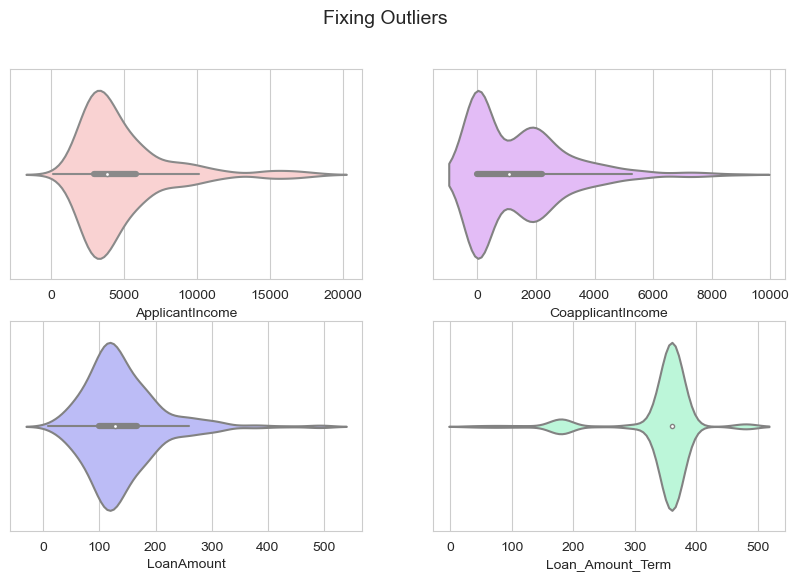

In [35]:
# Standardize the ApplicantIncome and CoapplicantIncome columns
df = z_score(df, "ApplicantIncome")
df = z_score(df, "CoapplicantIncome")

# Create a 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2)

# Create violin plots for each column and add them to the subplot
sns.violinplot(x=df["LoanAmount"], ax=axes[1, 0], color="#b3b3ff")
sns.violinplot(x=df["Loan_Amount_Term"], ax=axes[1, 1], color="#b3ffd9")
sns.violinplot(x=df["ApplicantIncome"], ax=axes[0, 0], color="#ffcccc")
sns.violinplot(x=df["CoapplicantIncome"], ax=axes[0, 1], color="#e6b3ff")

# Set the size of the figure and add a title
fig.set_size_inches(10, 6)
fig.suptitle("Fixing Outliers", fontsize=14)

# Show the plot
plt.show()

<h2><center><strong>Explartory data analysis (EDA) & Preposessing

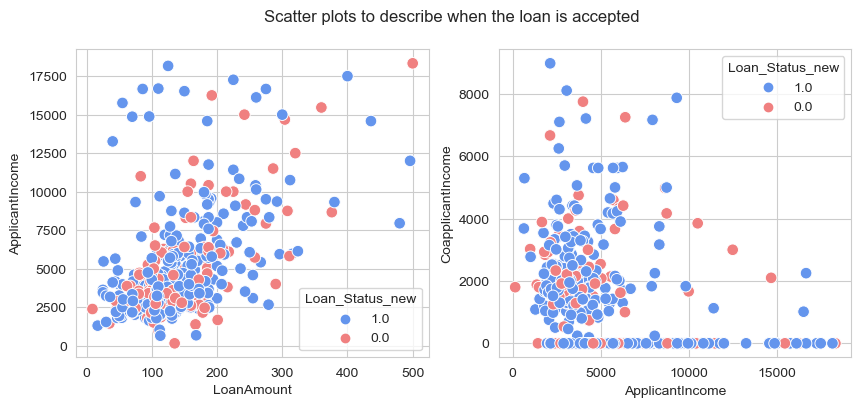

In [37]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# Define a dictionary of colors to map Loan_Status_new values to colors
colors = {1.0: theme_colors[0], 0.0: theme_colors[1]}

# Create a scatter plot of ApplicantIncome vs CoapplicantIncome
sns.scatterplot(x="ApplicantIncome", y="CoapplicantIncome",
                hue="Loan_Status_new", data=df, ax=axes[1],
                hue_order=[1.0, 0.0], palette=colors, s=70)

# Create a scatter plot of LoanAmount vs ApplicantIncome
sns.scatterplot(x="LoanAmount", y="ApplicantIncome",
                hue="Loan_Status_new", data=df,
                ax=axes[0], palette=colors,
                hue_order=[1.0, 0.0], s=70)

# Set the size of the figure
fig.set_size_inches(10, 4)

# Set the title of the figure
fig.suptitle("Scatter plots to describe when the loan is accepted")

# Show the plot
plt.show()


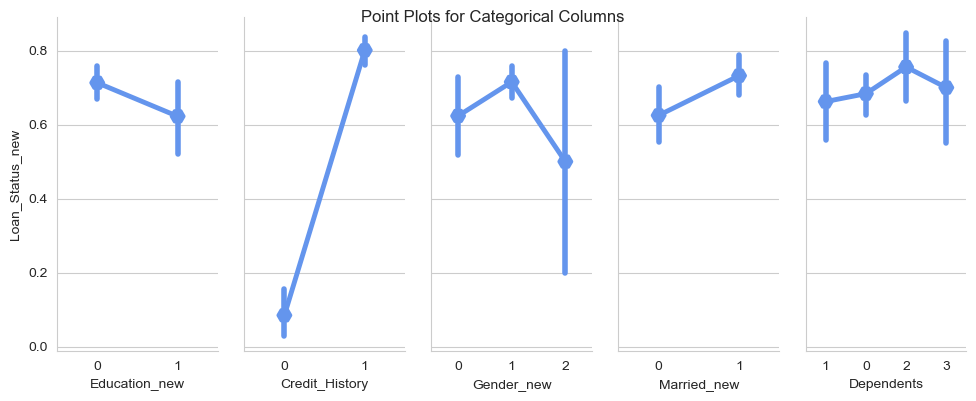

In [39]:
# create a PairGrid object with specified data, y-axis variable, and x-axis variables
# set height and aspect to control the size and shape of each subplot
grid = sns.PairGrid(data=df,
                    y_vars="Loan_Status_new",
                    x_vars=["Education_new", "Credit_History", "Gender_new", "Married_new", "Dependents"],
                    height=4,
                    aspect=.5)

# map a pointplot onto each subplot in the PairGrid object
# set various parameters such as scale, errwidth, color, and markers to customize the appearance of the plots
grid.map(sns.pointplot,
         scale=1.3,
         errwidth=4,
         color=theme_colors[0],
         markers="H",
         join=True)

# add a title to the overall figure
grid.fig.suptitle("Point Plots for Categorical Columns")

# display the figure
plt.show()


(Loan status):       1 is accepted and 0 is not accepted<br>
(Property area):     rural is 0, semiurban is 1, urban is 2<br>
(Self employed):     0 is no 1 is yes <br>
(Education):         1 is Graduated 0 is Not graduated<br>
(Married):           1 is Married 0 is Not married<br>
(Gender):            1 is Female 0 is Male 2 is Unknown<br>

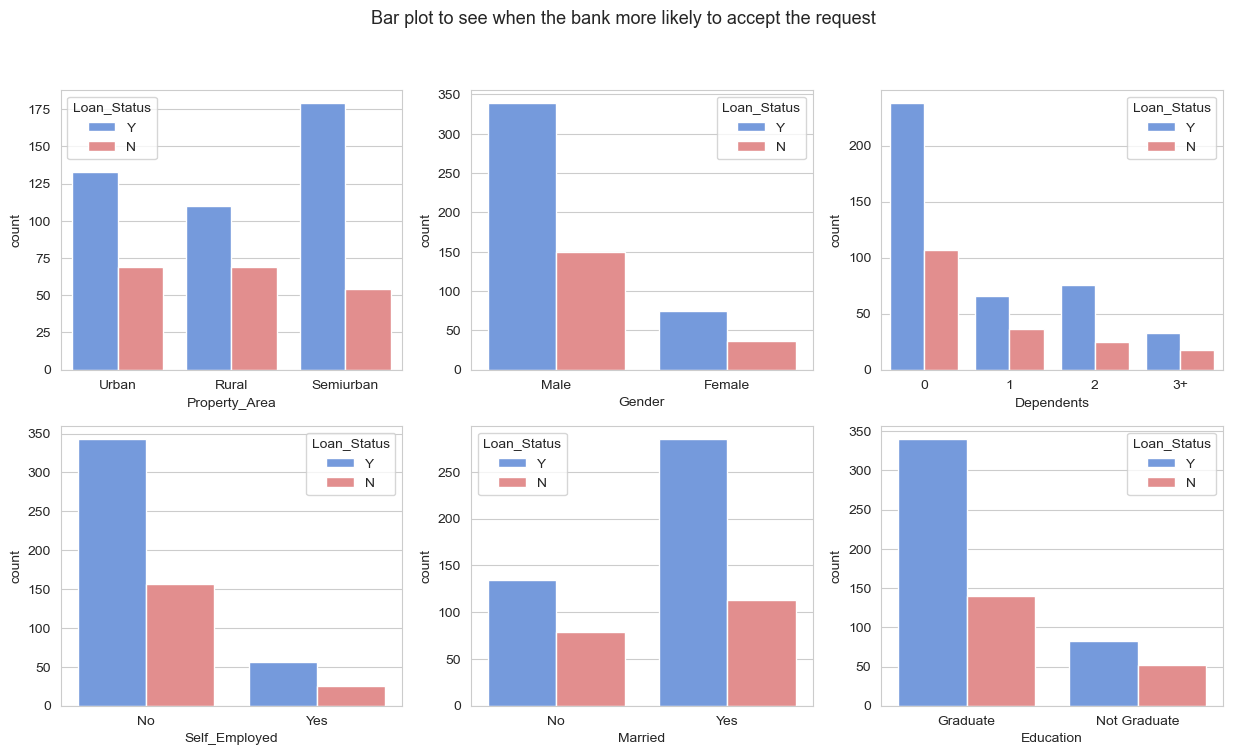

In [41]:
# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3)

# Plot a countplot on the first subplot (row=0, col=0)
sns.countplot(data=base_df, x="Property_Area", hue="Loan_Status", palette=theme_colors, ax=axes[0, 0])

# Plot a countplot on the second subplot (row=0, col=1)
sns.countplot(data=base_df, x="Gender", hue="Loan_Status", palette=theme_colors, ax=axes[0, 1])

# Plot a countplot on the third subplot (row=0, col=2)
sns.countplot(data=base_df, x="Dependents", hue="Loan_Status", palette=theme_colors, ax=axes[0, 2])

# Plot a countplot on the fourth subplot (row=1, col=0)
sns.countplot(data=base_df, x="Self_Employed", hue="Loan_Status", palette=theme_colors, ax=axes[1, 0])

# Plot a countplot on the fifth subplot (row=1, col=1)
sns.countplot(data=base_df, x="Married", hue="Loan_Status", palette=theme_colors, ax=axes[1, 1])

# Plot a countplot on the sixth subplot (row=1, col=2)
sns.countplot(data=base_df, x="Education", hue="Loan_Status", palette=theme_colors, ax=axes[1, 2])

# Set the size of the figure
fig.set_size_inches(15, 8)

# Set the title of the figure
fig.suptitle("Bar plot to see when the bank more likely to accept the request", fontsize=font)

# Display the plot
plt.show()


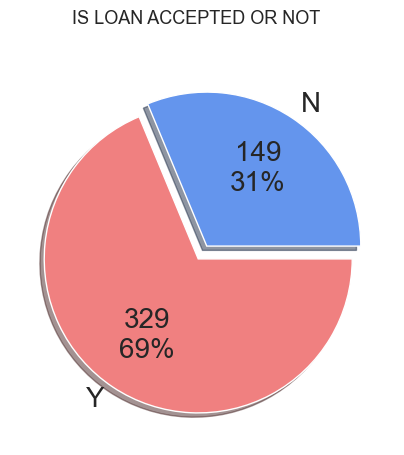

In [43]:
# Create a figure and axes object for the plot
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))

# Set the percentage of space between slices in the pie chart
spaces = (0.05, 0.05)

# Define a label function to display the count and percentage for each slice
label_function = lambda val: f'{val / 100 * len(df):.0f}\n{val:.0f}%'

# Group the data by "Loan_Status" and plot a pie chart with labels and formatting options
base_df.groupby("Loan_Status").size().plot(kind="pie", autopct=label_function,
                                           textprops={'fontsize': 20},
                                           ax=ax, colors=theme_colors, ylabel="",
                                           shadow=True, explode=spaces)

# Add a title to the plot
fig.suptitle("IS LOAN ACCEPTED OR NOT", fontsize=font)

# Display the plot
plt.show()


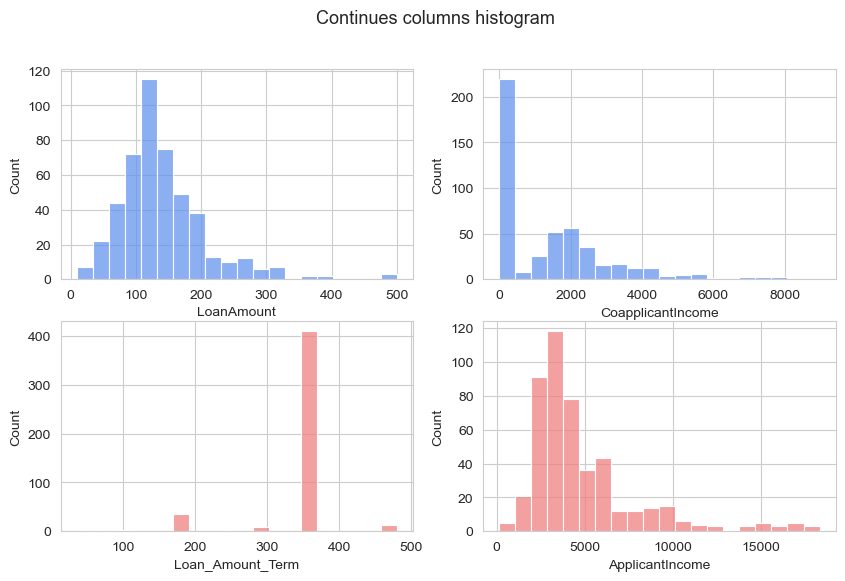

In [45]:
# create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

# plot histogram of CoapplicantIncome on the top-right subplot
sns.histplot(data=df, x="CoapplicantIncome", ax=axes[0,1], bins=20, color=theme_colors[0])

# plot histogram of ApplicantIncome on the bottom-right subplot
sns.histplot(data=df, x="ApplicantIncome", ax=axes[1,1], bins=20, color=theme_colors[1])

# plot histogram of LoanAmount on the top-left subplot
sns.histplot(data=df, x="LoanAmount", ax=axes[0,0], bins=20, color=theme_colors[0])

# plot histogram of Loan_Amount_Term on the bottom-left subplot
sns.histplot(data=df, x="Loan_Amount_Term", ax=axes[1,0], bins=20, color=theme_colors[1])

# set the size of the figure
fig.set_size_inches(10, 6)

# set the title of the figure
fig.suptitle("Continues columns histogram", fontsize=font)

# show the figure
plt.show()


From this histogrm we can find that co-applicant income is<br>
about 360 must of time so we will drop it to enchance the<br>
performance of the ML models.

In [46]:
df = df.drop("Loan_Amount_Term", axis= 1)

<h2><strong><center>Analysis conclusions</strong></h2>


<ul>
        <li> <em>The bank doesn't accept the loan request more likly if co-applicant income = 2000
        <li> <em>There is positive correlation between the requsted loan amount and applicant income
        <li> <em>The bank doesn't accept more likly if loan amount between 100K and 200K and applicant income = 2500
        <li> <em>The bank more likly to accept the loan request if you are married.
        <li> <em>You are more likly to get the loan if you are semi urban.
        <li> <em>There is a negative relationship between count of dependents and the chance of your loan be accepted
        <li> <em>The general ratio of getting a loan is <strong>69%</strong>
        <li> <em>The loan request is more likely to be accepted if you are graduated

<h2><center><strong>Machine learning steps

<h4>1- Preprossesing

We will prepeprocess the data with 2 different ways:
<ol>
    <li>First way we will scale the data with Min Max scaling then we will <br>
        radnom oversample the data then normalize it using <strong>log</strong> function<br>
        all of this preprocessing way is for neural networks.
    <li>Secondly we will scale the data using standard scaler for classical<br>
        ML models.

In [47]:
target_col: str = "Loan_Status_new"

continous_cols = ["LoanAmount", "Loan_Amount_Term",
                  "ApplicantIncome", "CoapplicantIncome"]

del continous_cols[1]

In [48]:
mapper = DataFrameMapper([(continous_cols, MinMaxScaler())])

y_ros = df[target_col]
X_ros = mapper.fit_transform(df.copy(), len(continous_cols))
X_ros = pd.DataFrame(X_ros, index=df.index, columns=continous_cols)
X_ros = X_ros.join(df[df.columns.difference(X_ros.columns)]).drop(target_col, axis =1)

In [49]:
print(f"Shape of features before random oversampling: {X_ros.shape}")
X_ros, y_ros = RandomOverSampler().fit_resample(X_ros, y_ros)

print(f"Shape of features after random oversampling: {X_ros.shape}\n")
print(f"is there any nulls after the ROS: \n{X_ros.isnull().sum()}")

Shape of features before random oversampling: (478, 10)
Shape of features after random oversampling: (664, 10)

is there any nulls after the ROS: 
LoanAmount           0
ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education_new        0
Gender_new           0
Married_new          0
Property_Area_new    0
Self_Employed_new    0
dtype: int64


In [50]:
X = pd.DataFrame(StandardScaler().fit_transform(df[continous_cols].values),
                 index= df.index, columns= continous_cols)

X = X.join(df[df.columns.difference(X.columns)]).drop(target_col, axis =1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 1 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanAmount         478 non-null    float64
 1   ApplicantIncome    478 non-null    float64
 2   CoapplicantIncome  478 non-null    float64
 3   Credit_History     478 non-null    int16  
 4   Dependents         478 non-null    object 
 5   Education_new      478 non-null    int8   
 6   Gender_new         478 non-null    int8   
 7   Married_new        478 non-null    int8   
 8   Property_Area_new  478 non-null    int8   
 9   Self_Employed_new  478 non-null    int8   
dtypes: float64(3), int16(1), int8(5), object(1)
memory usage: 38.1+ KB


In [51]:
# Converting dependents column to int8 data type:

X["Dependents"] = X["Dependents"].astype(np.int8)
X_ros["Dependents"] = X_ros["Dependents"].astype(np.int8)

In [52]:
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/5,
                                                    random_state= 432 )

In [53]:
print(f"Train size = {len(X_train)}")
print(f"Test size = {len(X_test)}")

Train size = 382
Test size = 96


X_ros and y_ros is Min max scaled and random over sampeled <em>

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def model_report(y_true, y_pred):
    
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    print("precision: {:4f}\nrecall: {}\nf1-score: {:4f}\nloss: {:4f}\naccuracy: {:4f}".
          format(pre, rec, f1, loss, acc))

<h4>2- Classic machine learning models

In [55]:
nca = NeighborhoodComponentsAnalysis(n_components= 10)
knn = KNeighborsClassifier(n_neighbors= 25, algorithm= "kd_tree")
random_forest = RandomForestClassifier(max_depth= 3, criterion= "gini")
desision_tree = DecisionTreeClassifier(max_depth= 2, criterion= "entropy")
ada = AdaBoostClassifier()
gussian_nayive = GaussianNB()
regressior = LogisticRegression()
pipe = Pipeline([("nca", nca), ("knn", knn)])

models = {"KNN" : knn, "KNN & NCA" : pipe, "Random forest": random_forest,
          "Desision tree" : desision_tree, "Gussian nayive": gussian_nayive,
          "Logistic regressior" : regressior, "Ada Boost": ada, "SVM" : SVC(),
          "SGD classifier" : SGDClassifier()}

print("*"* 50, "Classic models performance", "*" * 50, "\n")
for mode_name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{mode_name}: ")
    model_report(y_test, y_pred)
    print("=" * 25 + "\n")
    

************************************************** Classic models performance ************************************************** 

KNN: 
precision: 0.684211
recall: 1.0
f1-score: 0.812500
loss: 10.793617
accuracy: 0.687500



C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

KNN & NCA: 
precision: 0.738636
recall: 1.0
f1-score: 0.849673
loss: 8.275107
accuracy: 0.760417

Random forest: 
precision: 0.812500
recall: 1.0
f1-score: 0.896552
loss: 5.396809
accuracy: 0.843750

Desision tree: 
precision: 0.812500
recall: 1.0
f1-score: 0.896552
loss: 5.396809
accuracy: 0.843750

Gussian nayive: 
precision: 0.812500
recall: 1.0
f1-score: 0.896552
loss: 5.396809
accuracy: 0.843750

Logistic regressior: 
precision: 0.812500
recall: 1.0
f1-score: 0.896552
loss: 5.396809
accuracy: 0.843750

Ada Boost: 
precision: 0.805556
recall: 0.8923076923076924
f1-score: 0.846715
loss: 7.555474
accuracy: 0.781250

SVM: 
precision: 0.773810
recall: 1.0
f1-score: 0.872483
loss: 6.835958
accuracy: 0.802083

SGD classifier: 
precision: 0.816901
recall: 0.8923076923076924
f1-score: 0.852941
loss: 7.195687
accuracy: 0.791667



From the cell above we can find that the best three models are <em> (The score is not constant)<em><strong>:</strong>
<ul>
    <li>Gussian nayive
    <li>Logistic regressior
    <li>Desision tree
</ul>
so we will save those models to use later.

In [56]:
import pickle

pickle.dump(gussian_nayive, open("gussian_nayive.h5", "wb"))
pickle.dump(regressior, open("logistic_regressior.h5", "wb"))
pickle.dump(desision_tree, open("desision_tree.h5", "wb"))

In [57]:
base_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here we will use the random over sampled and min max scaled features to<br>
the neural network because it needs too much of data to get us good <br>
predictions.<br><br>

In [59]:
def plot_history(history):

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.plot(history.history["accuracy"], label= "Model accuracy", color= theme_colors[0])
    ax1.plot(history.history["val_accuracy"], label= "Valid accuracy", color= theme_colors[1])
    ax1.set_title("model accuracy")
    ax1.set_ylabel("accuracy")
    ax1.set_xlabel("epoch")
    # ax1.set_color_cycle(theme_colors)
    
    ax2.plot(history.history["loss"], label= "Model loss", color= theme_colors[0])
    ax2.plot(history.history["val_loss"], label= "Valid loss", color= theme_colors[1])
    ax2.set_title("model loss", )
    ax2.set_ylabel("loss")
    ax2.set_xlabel("epoch")
    # ax2.set_color_cycle(theme_colors)

    ax1.legend()
    ax2.legend()

    fig.suptitle("Model loss & accuracy", fontsize= font)
    fig.set_size_inches(12, 7)
    plt.show()

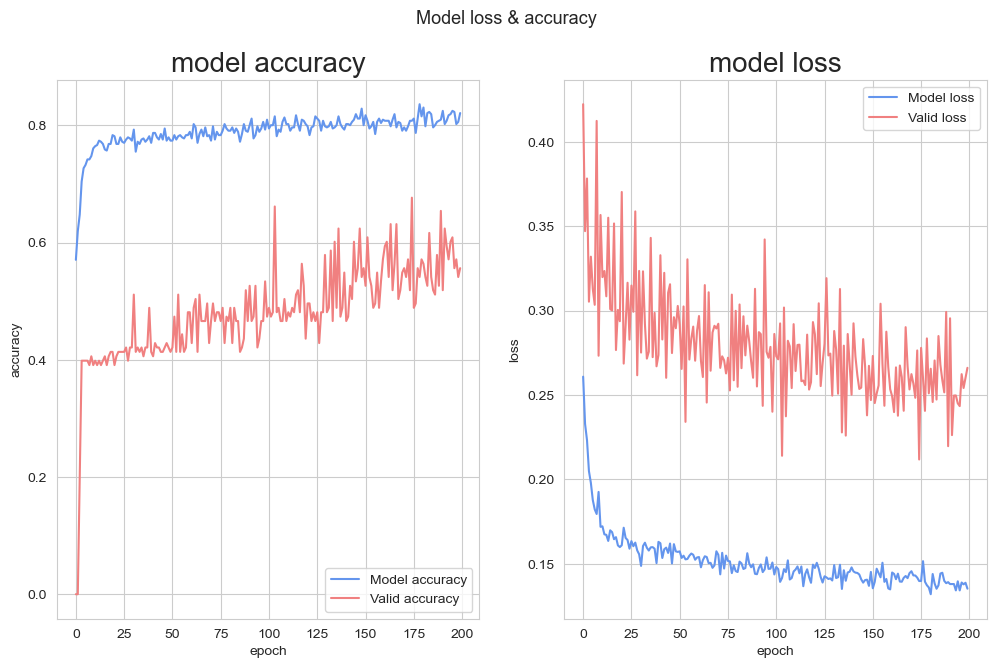

In [60]:
model = keras.Sequential()

model.add(keras.layers.Dense(units= 10,
                                 activation= "relu", input_shape= (10,))) # Input layer
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(units= 16,
                                 activation= "softplus")) # Hidden layer
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(units= 16,
                                 activation= "relu")) # Hidden layer
model.add(keras.layers.Dropout(0.15))

model.add(keras.layers.Dense(units= 1,
                                 activation= "sigmoid")) # Output layer

model.compile(optimizer= keras.optimizers.Adam(0.01), 
                              loss = "mse",
                              metrics= ["accuracy"])
    
# Training the nueral network with the ROS and min max scaled data
history = model.fit(
    X_ros, y_ros,
    epochs= 200,
    validation_split=0.2,
    verbose= 0)

plot_history(history)

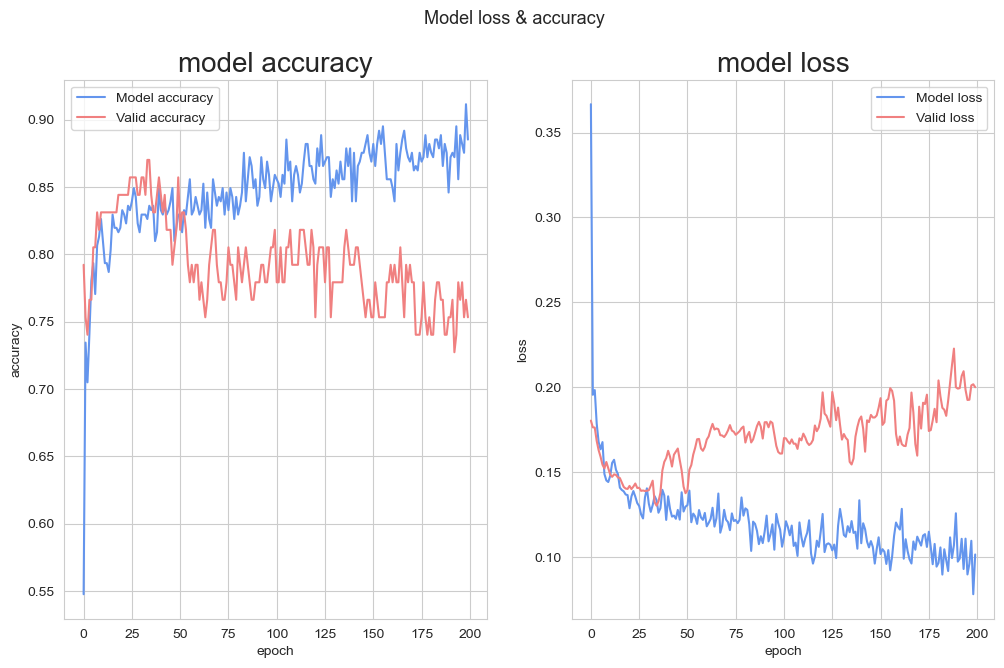

In [61]:
# Training the nueral network but this time with Standard scaled data
history = model.fit(
    X_train, y_train,
    epochs= 200,
    validation_split=0.2,
    verbose= 0)

plot_history(history)

We can see from this visualization that the standard scaling is
better than min max scaling and the accuracy of the neural 
network is better than classical models.